# <u> THE SPARKS FOUNDATION </u>


## DATA SCIENCE AND BUSSINESS ANALYTICS INTERNSHIP

## TASK-1 - PREDICTION USING SUPERVISED MACHINE LEARNING

### PREDICT THE PERCENTAGE OF AN STUDENT BASED ON THE NO OF STUDY HOURS

### BATCH: GRIP DECEMBER'21

#### AUTHOR: KRISHNAKANT VERMA




## IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline 

## READING DATA FROM URL

In [11]:
# Reading data from remote link
url = "http://bit.ly/w-data"
student_data = pd.read_csv(url)
print("Data imported successfully")

student_data.head(15)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Now I'll plot our data points on 2-D graph to see if any relationship in between our data.


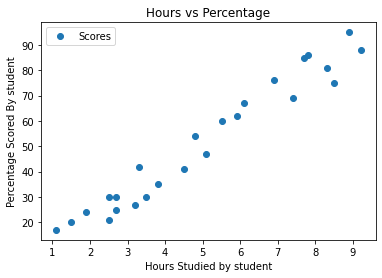

In [12]:
student_data.plot(x='Hours', y='Scores',style="o") # we can use markers to get more clear view when needed
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied by student')  
plt.ylabel('Percentage Scored By student')  
plt.show()

## I'll now divide data into "Attributes" (inputs) and "Labels" (outputs).


In [15]:
# attribute means the inputs on which we are going to predict
# label is what we are going to predict (percentage)

X= student_data.iloc[:, :-1].values  
Y= student_data.iloc[:, 1].values  

#iloc is integer-location based indexing for selection by position.

print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [16]:
# unpacking operator *

print(*X)  


[2.5] [5.1] [3.2] [8.5] [3.5] [1.5] [9.2] [5.5] [8.3] [2.7] [7.7] [5.9] [4.5] [3.3] [1.1] [8.9] [2.5] [1.9] [6.1] [7.4] [2.7] [4.8] [3.8] [6.9] [7.8]


In [17]:
print(Y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


####  using Scikit-Learn's built-in train_test_split() method

In [18]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4) 

## TRAINING THE ALGORITHM


In [19]:
# spliting students data into training and testing sets

# i'll use linear regression to predict the value of a X (independent variable) based on the value of Y(dependent)

from sklearn.linear_model import LinearRegression  
regressor_data = LinearRegression()  
regressor_data.fit(X_train, y_train) 
print("Training is completed")

Training is completed


In [20]:
# Plotting the regression line for further prediction

line = regressor_data.coef_*X+regressor_data.intercept_

# coef is the coefficients for the prediction of each targets
# intercept will be the point where function crosses the y-axis.( mean value of Y when all X=0.)

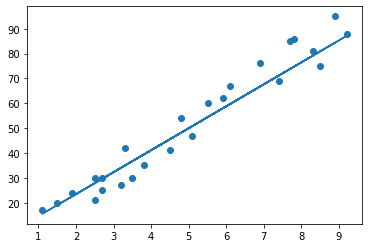

In [21]:
# Plotting the test data using scatter plot

plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

## Prediction

In [22]:
# Testing data - In Hours

print(X_test)

[[8.9]
 [3.2]
 [3.5]
 [7.7]
 [6.1]
 [4.5]
 [4.8]
 [8.3]
 [5.5]
 [7.8]]


### Predicting Scores

In [25]:
predict_y= regressor_data.predict(X_test)
predict_y

array([84.42618496, 34.05043585, 36.70179107, 73.8207641 , 59.68020294,
       45.53964179, 48.190997  , 79.12347453, 54.37749251, 74.70454917])

### Comparing Actual data VS Predicted

In [26]:
data_frame = pd.DataFrame({'Actual': y_test, 'Predicted': predict_y})  
data_frame

,Actual,Predicted
0,95,84.426185
1,27,34.050436
2,30,36.701791
3,85,73.820764
4,67,59.680203
5,41,45.539642
6,54,48.190997
7,81,79.123475
8,60,54.377493
9,86,74.704549


## Predicting the score for 9.25 hour of study

In [27]:
hours = 9.25
prediction = regressor_data.predict([[hours]])
print("No of Hours=",hours)
print("Predicted Score =",prediction[0])

No of Hours= 9.25
Predicted Score = 87.51943271588124


## Evaluating the model

#### now i'll evaluate performance. we will compare how well different algorithms perform on a particular dataset.

In [29]:
#importing libraries
from sklearn import metrics  
# the amount of error in your measurements.we can find that by MEAN ABSOLUTE ERRORS

print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test,predict_y)) 

Mean Absolute Error: 7.19682034867883


### Thank You